# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [25]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1, inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [13]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [36]:
df_ = df.set_index('STATE')
print(df_.loc['MICHIGAN']['AVG_MATH_8_SCORE'].mean())
print(df_.loc['OHIO']['AVG_MATH_8_SCORE'].mean())

276.1666666666667
282.25


Find the average for your outcome score across all states in 2019

In [37]:
df.groupby(["YEAR", "STATE"])["AVG_MATH_8_SCORE"].mean()

YEAR  STATE        
1990  ALABAMA          253.0
      ARIZONA          260.0
      ARKANSAS         256.0
      CALIFORNIA       256.0
      COLORADO         267.0
                       ...  
2019  VIRGINIA         287.0
      WASHINGTON       286.0
      WEST_VIRGINIA    272.0
      WISCONSIN        289.0
      WYOMING          286.0
Name: AVG_MATH_8_SCORE, Length: 602, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [41]:
df.groupby(["YEAR", "STATE"])["AVG_MATH_8_SCORE"].max()

YEAR  STATE        
1990  ALABAMA          253.0
      ARIZONA          260.0
      ARKANSAS         256.0
      CALIFORNIA       256.0
      COLORADO         267.0
                       ...  
2019  VIRGINIA         287.0
      WASHINGTON       286.0
      WEST_VIRGINIA    272.0
      WISCONSIN        289.0
      WYOMING          286.0
Name: AVG_MATH_8_SCORE, Length: 602, dtype: float64

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [45]:
df["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df.groupby(["YEAR", "STATE"])["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"].mean()

YEAR  STATE        
1990  ALABAMA         NaN
      ARIZONA         NaN
      ARKANSAS        NaN
      CALIFORNIA      NaN
      COLORADO        NaN
                       ..
2019  VIRGINIA        NaN
      WASHINGTON      NaN
      WEST_VIRGINIA   NaN
      WISCONSIN       NaN
      WYOMING         NaN
Name: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, Length: 602, dtype: float64

Feature engineering justification:I wanted to see if the amount spent on support services per student affects math scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

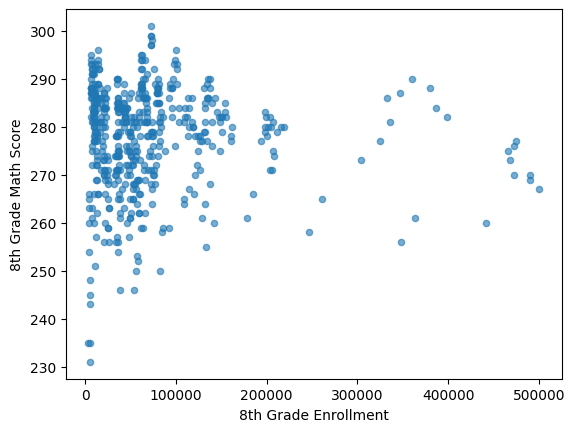

In [46]:
df.plot.scatter(x='ENROLL_8', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Enrollment')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

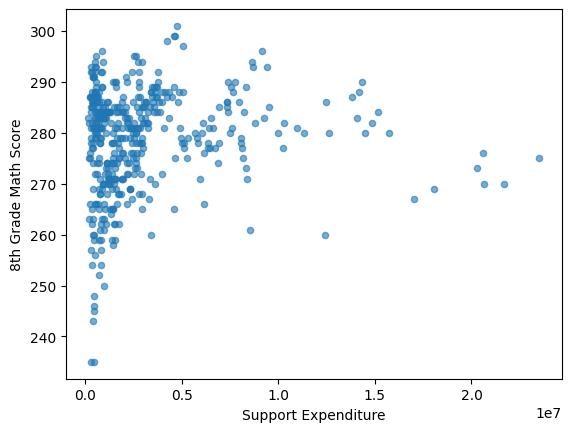

In [48]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Expenditure')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [52]:
from sklearn.model_selection import train_test_split

In [66]:
X = df[['ENROLL_8','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
# create your model here
model = LinearRegression()

In [70]:
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [72]:
print(model.intercept_)
print(model.coef_)
np.mean(model.predict(X_test)-y_test)

-5.684341886080802e-14
[2.06035992e-22 1.00000000e+00 1.02850156e-16]


1.052655904829778e-15

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

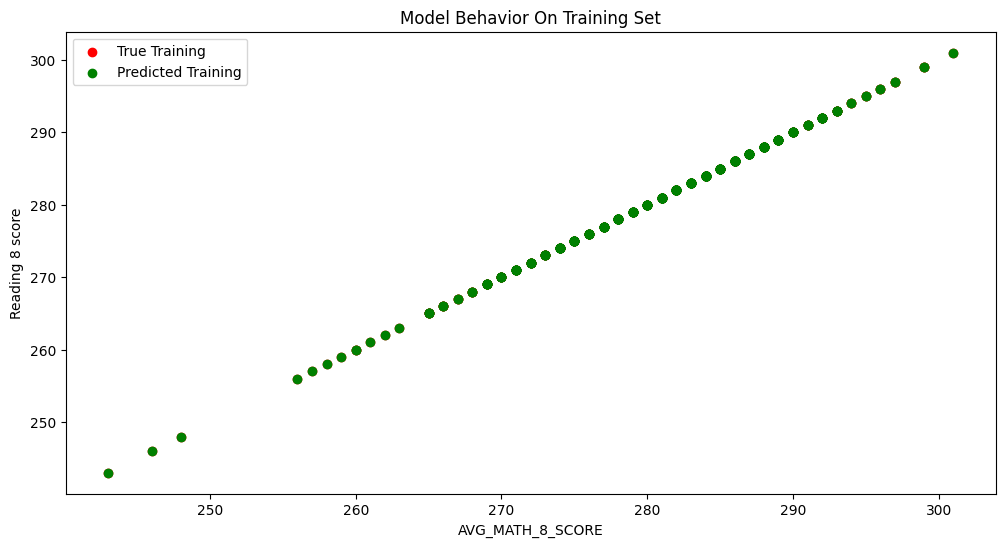

In [73]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

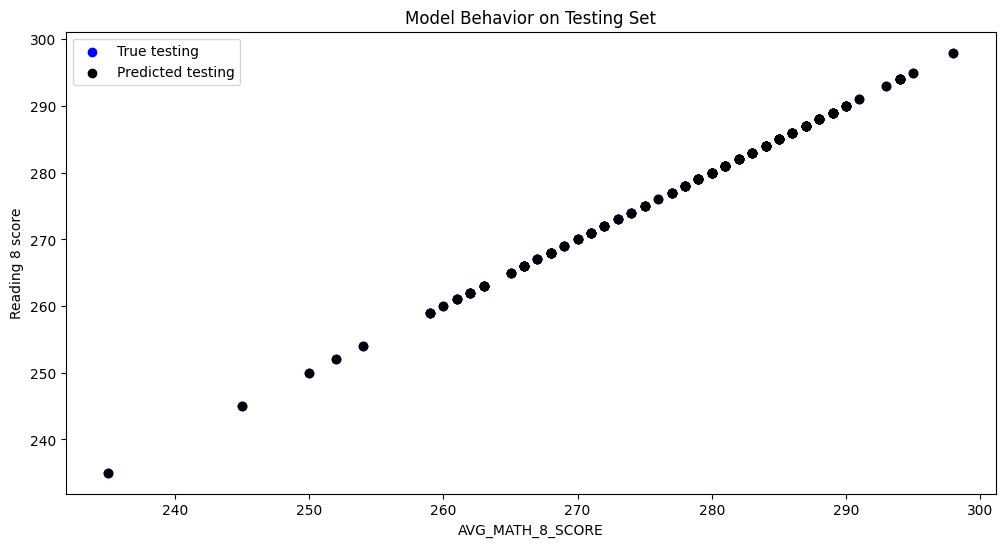

In [74]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My model works very well, I think it is working too well and I think I may have done something wrong. Maybe overfitting. I was trying to see how support services expenditure affects 8th grade math scores.